In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Ravel Nugent Score

## GG97 OTU

In [2]:
task = 'Ravel Nugent Low/High GG97 OTU'
folder = 'ravel-nugentv2'

In [3]:
num_features = 1095
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/ravel_nugent_cat_gg_exp1/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/ravel_nugent_cat_gg_exp2/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/ravel_nugent_cat_gg_exp3/best_test.csv', sep=';') # NoRel+CLR

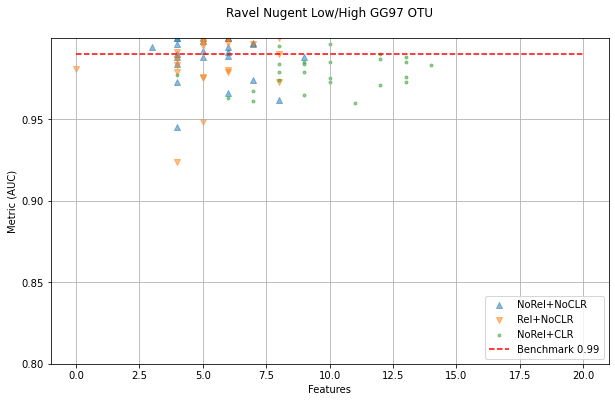

In [5]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.99, filename='./plotsv2/ravel_nugent_gg97_otu.png', xmax=20, ylim=(0.8, 1))

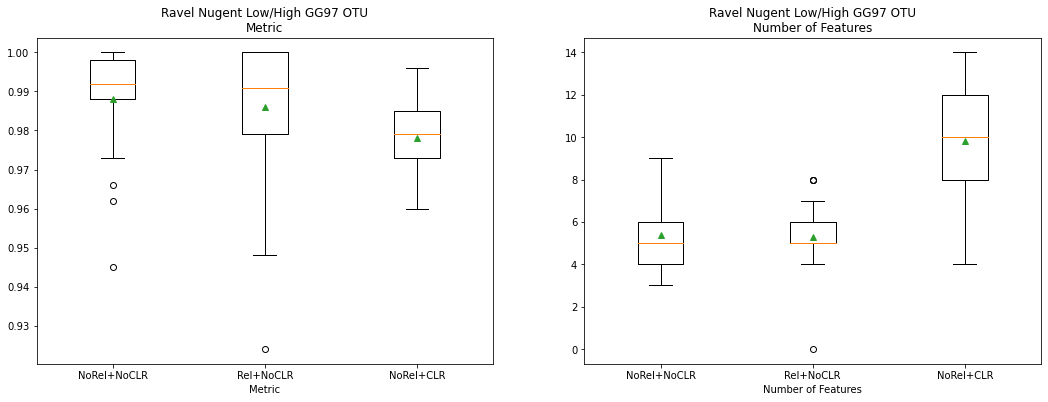

In [6]:
utils.boxplot(df1, df2, df3, num_features, weights, task, filename='./plotsv2/ravel_nugent_boxplot_gg97_otu.png')

In [7]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [8]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [9]:
n = 100

In [10]:
# Experiment 1

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 1095)


In [11]:
# Experiment 2

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 1095)


In [12]:
# Experiment 3

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 1095)


In [13]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
27,16,4,0.984,0.980,"[3, 136, 791, 1060]",0.980,0.980,"[0.992, 0.978, 0.983, 0.989, 1.0, 0.997, 0.98,...",0.984,0.948,1.0,0.012
0,0,6,1.000,0.995,"[7, 115, 133, 136, 154, 792]",0.995,0.995,"[0.995, 0.968, 0.998, 0.989, 0.94, 0.982, 0.99...",0.983,0.937,1.0,0.016
17,9,5,0.998,0.993,"[3, 136, 791, 875, 1060]",0.993,0.993,"[0.984, 0.97, 0.991, 0.994, 0.995, 0.96, 0.97,...",0.983,0.907,1.0,0.016
15,8,7,0.997,0.991,"[115, 127, 136, 474, 477, 791, 875]",0.991,0.991,"[0.952, 0.979, 0.987, 0.978, 0.995, 0.989, 0.9...",0.983,0.936,1.0,0.013
23,12,3,0.994,0.991,"[136, 141, 791]",0.991,0.991,"[0.956, 0.991, 0.941, 0.98, 0.972, 0.99, 0.985...",0.983,0.935,1.0,0.013


In [14]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
0,0,5,0.948,0.943,"[3, 136, 375, 768, 987]",0.943,0.943,"[0.936, 1.0, 0.966, 0.998, 0.995, 0.94, 0.978,...",0.981,0.922,1.0,0.018
41,18,4,0.979,0.975,"[3, 136, 375, 898]",0.975,0.975,"[0.99, 0.991, 1.0, 0.981, 0.949, 0.962, 0.995,...",0.980,0.939,1.0,0.014
51,23,6,0.980,0.975,"[3, 115, 136, 791, 917, 1026]",0.975,0.975,"[0.992, 0.951, 0.987, 0.99, 0.997, 0.996, 0.94...",0.980,0.917,1.0,0.017
29,14,6,0.997,0.992,"[3, 42, 115, 136, 375, 1086]",0.992,0.992,"[0.963, 0.98, 0.985, 0.998, 0.998, 0.991, 0.99...",0.980,0.890,1.0,0.018
12,6,6,0.979,0.974,"[2, 3, 7, 136, 1060, 1086]",0.974,0.974,"[0.993, 0.981, 0.969, 0.995, 0.983, 0.992, 0.9...",0.980,0.911,1.0,0.019


In [15]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
27,18,8,0.995,0.988,"[7, 11, 85, 127, 136, 143, 426, 996]",0.988,0.988,"[0.99, 0.983, 0.991, 0.967, 0.968, 0.943, 0.99...",0.981,0.912,1.0,0.015
25,17,4,0.977,0.973,"[3, 115, 136, 824]",0.973,0.973,"[0.99, 0.988, 0.998, 0.962, 0.996, 0.992, 0.98...",0.981,0.935,1.0,0.016
18,11,8,0.974,0.967,"[1, 3, 136, 144, 417, 540, 791, 1026]",0.967,0.967,"[0.976, 0.989, 0.969, 0.994, 0.953, 0.978, 0.9...",0.980,0.890,1.0,0.016
3,1,8,0.979,0.972,"[133, 136, 141, 324, 824, 978, 985, 1086]",0.972,0.972,"[1.0, 0.99, 0.947, 0.998, 0.99, 0.991, 0.97, 0...",0.979,0.911,1.0,0.021
10,6,7,0.967,0.961,"[0, 136, 141, 417, 769, 819, 875]",0.961,0.961,"[0.994, 1.0, 0.911, 0.986, 0.985, 0.999, 0.963...",0.979,0.908,1.0,0.020


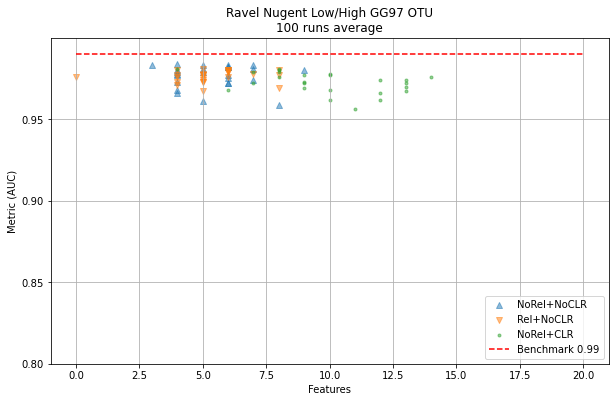

In [16]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.99, filename='./plotsv2/ravel_nugent_gg97_otu_avg_n.png', xmax=20, ylim=(0.8, 1))

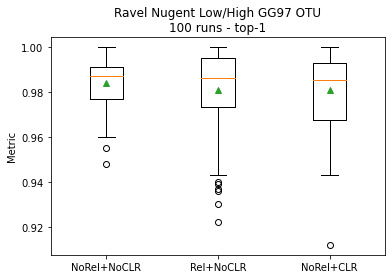

In [17]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plotsv2/ravel_nugent_boxplot_nruns_top1_gg97_otu.png')

---

In [10]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [11]:
folder = 'ravel-nugentv2'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

best_n_features = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [12]:
config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    score, fi = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    score, fi = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['Rel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    score, fi = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+CLR'].append(len(top_n_features))

Final dataset shape: (342, 1095)
Final dataset shape: (342, 1095)
Final dataset shape: (342, 1095)


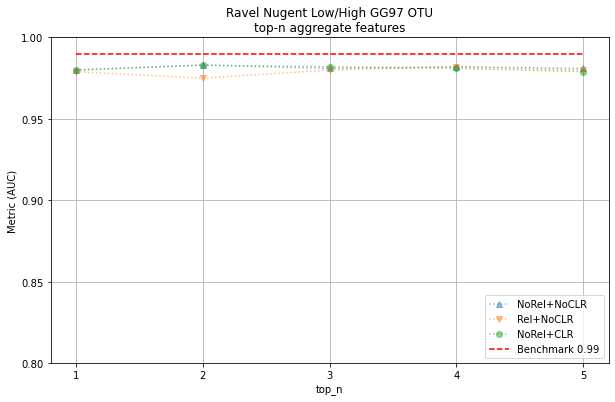

In [13]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.99, filename='./plotsv2/ravel_nugent_nruns_topn_gg97_otu.png', xmax=(top_n-1), ylim=(0.8, 1.0001), top_n=top_n)

In [14]:
print(best_n)
print(best_n_features)

{'NoRel+NoCLR': [0.98, 0.983, 0.981, 0.982, 0.981], 'Rel+NoCLR': [0.979, 0.975, 0.98, 0.982, 0.98], 'NoRel+CLR': [0.98, 0.983, 0.982, 0.981, 0.979]}
{'NoRel+NoCLR': [4, 9, 10, 13, 14], 'Rel+NoCLR': [5, 6, 10, 12, 15], 'NoRel+CLR': [8, 11, 17, 23, 27]}


---

In [15]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [28]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
score, fi = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        14289       0.0208    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__Anaerococcus; s__']
        495451      0.0349    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Porphyromonadaceae; g__Porphyromonas; s__']
       1028283      0.0563    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__']
        114964      0.0834    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__vaginalis']
       1105876      0.0923    []
        133372      0.1023    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__; s__']
        137183      0.2715    []
        986513      0.3308    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__Clostridium; s__']



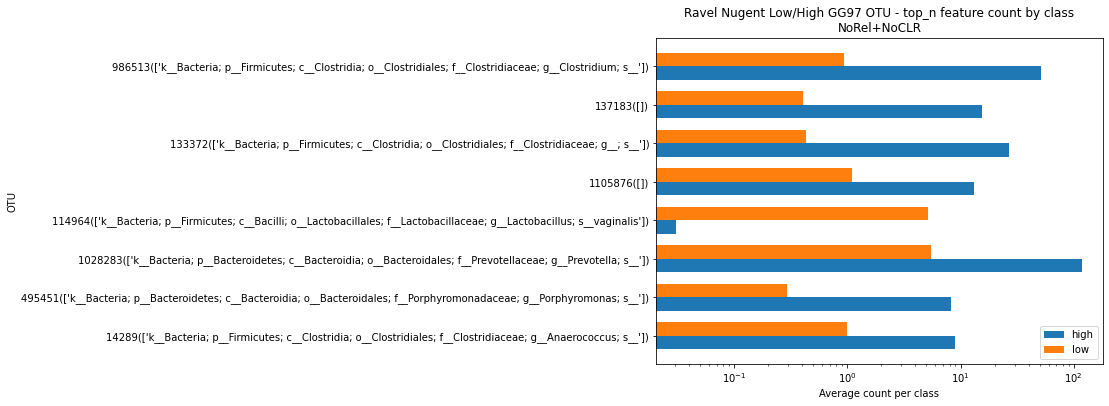

In [29]:
features = data1.features[top_n_features]
filename = f'./plotsv2/ravel_nugent_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data1, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,6), filename=filename)

In [26]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        867982      0.0148    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Veillonellaceae; g__; s__']
        258882      0.0237    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Gemellales; f__Gemellaceae; g__Gemella; s__']
        495451      0.0282    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Porphyromonadaceae; g__Porphyromonas; s__']
        654307      0.0409    []
       1105876      0.0709    []
        114964      0.1078    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__vaginalis']
        851726      0.118     []
        715913      0.1533    []
        137183      0.4423    []



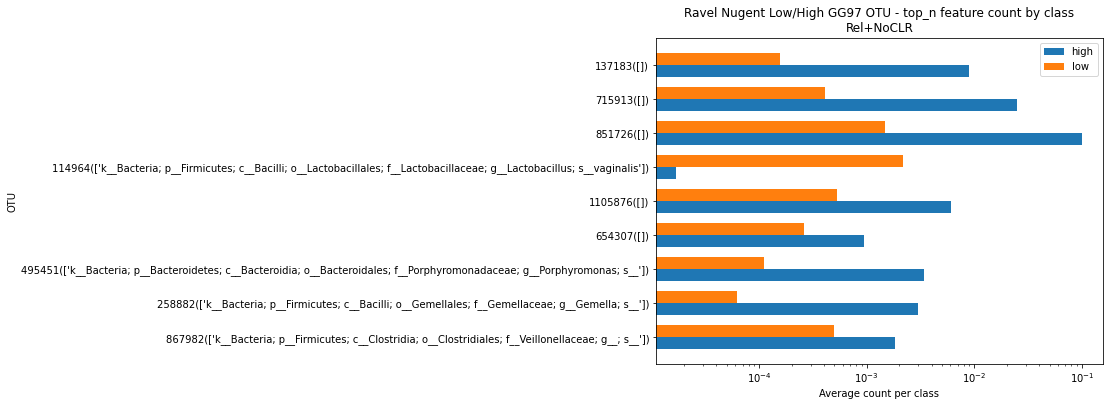

In [27]:
features = data2.features[top_n_features]
filename = f'./plotsv2/ravel_nugent_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data2, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,6), filename=filename)

In [22]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
       1105876      0.0156    []
        114964      0.0612    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__vaginalis']
       1028283      0.0628    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__']
        137183      0.1913    []
        133178      0.6691    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Coriobacteriales; f__Coriobacteriaceae; g__; s__']



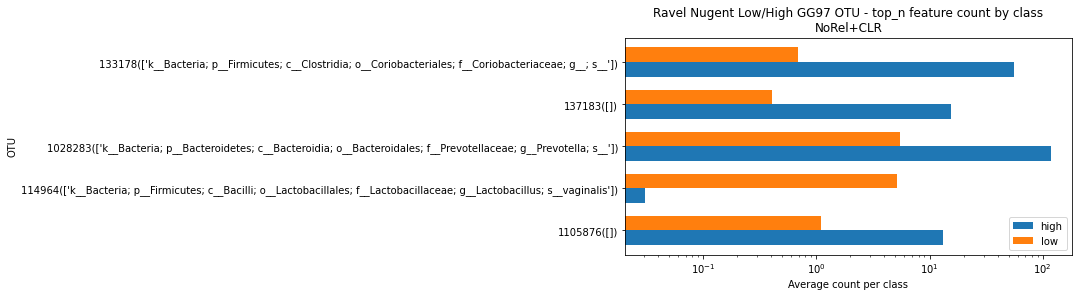

In [24]:
features = data3.features[top_n_features]
filename = f'./plotsv2/ravel_nugent_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data3, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,4), filename=filename)